## Imports

In [107]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
url = 'data/heart_disease_ind_2015.csv'
df = pd.read_csv(url)

### Various EDA

In [3]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [33]:
df.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

In [24]:
for x in df.columns:
    print(df[x].unique())

[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
[1. 0.]
[0. 1.]
[0. 2. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[5. 3. 2. 4. 1.]
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
[1. 0.]
[0. 1.]
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
[4. 6. 3. 5. 2. 1.]
[3. 1. 8. 6. 4. 7. 2. 5.]


In [4]:
df['HeartDiseaseorAttack'].value_counts(normalize=True)

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

Baseline = 0.9058 not having heart disease or attack.

In [25]:
df['HeartDiseaseorAttack'].unique()

array([0., 1.])

### Modeling Testing

In [ ]:
# features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
#             'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump'
#             'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
#             'Sex', 'Age', 'Education', 'Income'   ]

In [77]:
# models with all x features
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
            'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
            'Sex', 'Age', 'Education', 'Income'   ]

X = df[features]
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [78]:
# ss = StandardScaler()
# X_train_ss = ss.fit_transform(X_train)
# X_test_ss = ss.transform(X_test)

In [79]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
bag = BaggingClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

gbc = GradientBoostingClassifier()
# I think best model ^



list_of_classifiers = [lr, dtc, bag, rfc, abc, gbc]

In [80]:
for each in list_of_classifiers:
    print(str(each).split('(')[0])
    each.fit(X_train_ss, y_train)
    print('Training score:')
    print(each.score(X_train_ss, y_train))
    print('Testing score:')
    print(each.score(X_test_ss, y_test))
    print()

LogisticRegression
Training score:
0.9079154840744245
Testing score:
0.9069063386944182

DecisionTreeClassifier
Training score:
0.9963576158940397
Testing score:
0.8505676442762535

BaggingClassifier
Training score:
0.985588142541785
Testing score:
0.8941816461684011

RandomForestClassifier
Training score:
0.9962892883422685
Testing score:
0.9019552191737622

AdaBoostClassifier
Training score:
0.9073898875223378
Testing score:
0.9059602649006623

GradientBoostingClassifier
Training score:
0.9089088615578682
Testing score:
0.9075212866603595



In [72]:
for each in list_of_classifiers:
    print(str(each).split('(')[0])
    pred = each.predict(X_train_ss)
    print('Train RMSE: ')
    print(sqrt(mean_squared_error(y_train, pred)))
    print('Testing RMSE: ')
    pred = each.predict(X_test_ss)
    print(sqrt(mean_squared_error(y_test, pred)))
    print()

LogisticRegression
Train RMSE: 
0.30345430615757546
Testing RMSE: 
0.3051125387550991

DecisionTreeClassifier
Train RMSE: 
0.06035216736754584
Testing RMSE: 
0.3868298571453091

BaggingClassifier
Train RMSE: 
0.11998370540057711
Testing RMSE: 
0.32694123447166396

RandomForestClassifier
Train RMSE: 
0.06074280036060291
Testing RMSE: 
0.31397593746872726

AdaBoostClassifier
Train RMSE: 
0.3043190964722098
Testing RMSE: 
0.3066589882904751

GradientBoostingClassifier
Train RMSE: 
0.3018130852732065
Testing RMSE: 
0.30410312944729867



/Users/joshfitts/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


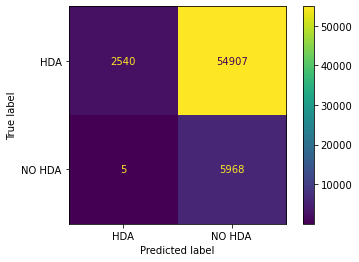

In [84]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, display_labels=['HDA', 'NO HDA'])

In [56]:
# models with highest corr
features_high_corr = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 
            'Diabetes', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']

X = df[features_high_corr]
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [57]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [58]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
bag = BaggingClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()


list_of_classifiers = [lr, dtc, bag, rfc, abc, gbc]

In [59]:
for each in list_of_classifiers:
    print(str(each).split('(')[0])
    each.fit(X_train_ss, y_train)
    print('Training score:')
    print(each.score(X_train_ss, y_train))
    print('Testing score:')
    print(each.score(X_test_ss, y_test))
    print()

LogisticRegression
Training score:
0.9076106380742143
Testing score:
0.9064963733837906

DecisionTreeClassifier
Training score:
0.942736255650163
Testing score:
0.8859192683695994

BaggingClassifier
Training score:
0.9391832229580573
Testing score:
0.8894670450961841

RandomForestClassifier
Training score:
0.9427204877536003
Testing score:
0.8934878587196468

AdaBoostClassifier
Training score:
0.9067434037632713
Testing score:
0.9057079785556607

GradientBoostingClassifier
Training score:
0.9082781456953642
Testing score:
0.9070009460737938

